In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Print the shape of the training and testing datasets
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)

Training dataset shape: (60000, 28, 28) (60000,)
Testing dataset shape: (10000, 28, 28) (10000,)


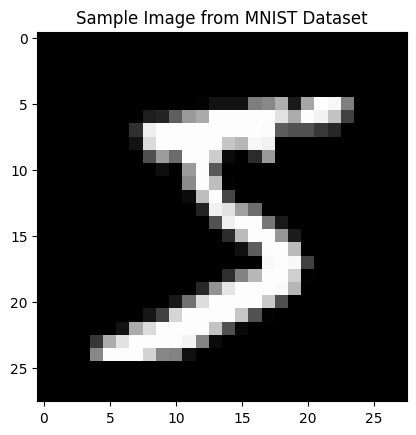

In [4]:
# Plot a sample image from the training dataset
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image from MNIST Dataset")
plt.show()

In [5]:
# Find unique labels
unique_labels = np.unique(y_train)
print("Unique labels:", unique_labels)

Unique labels: [0 1 2 3 4 5 6 7 8 9]


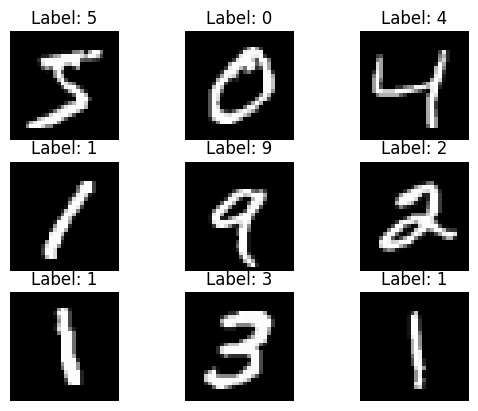

In [6]:
# Display 9 images from the X_train dataset with their labels
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [7]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [8]:
# Print the shape of the training and testing datasets
print("Training dataset shape:", X_train.shape)
print("Testing dataset shape:", X_test.shape)

Training dataset shape: (60000, 784)
Testing dataset shape: (10000, 784)


In [9]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [11]:
from keras.layers import Input

In [12]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8855 - loss: 0.3915 - val_accuracy: 0.9643 - val_loss: 0.1055
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9735 - loss: 0.0834 - val_accuracy: 0.9713 - val_loss: 0.0925
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.9777 - val_loss: 0.0742
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9877 - loss: 0.0357 - val_accuracy: 0.9785 - val_loss: 0.0766
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9899 - loss: 0.0301 - val_accuracy: 0.9768 - val_loss: 0.0799
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9748 - val_loss: 0.0921
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.9802 - val_loss: 0.0798
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accu

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9775 - loss: 0.0867
Test accuracy: 0.98%


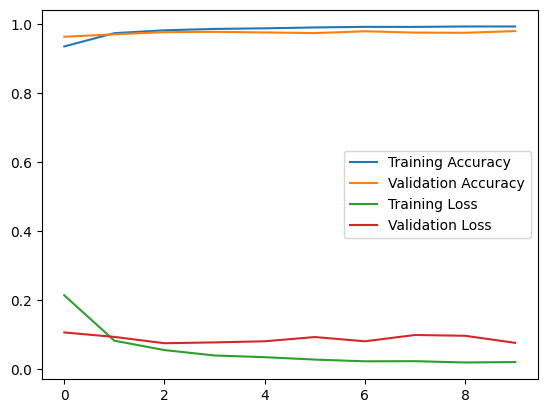

In [16]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [17]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [18]:
y_test_class = np.argmax(y_test, axis=1)

In [19]:
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
y_pred_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test_class, y_pred_class)

In [23]:
print(cm)

[[ 969    1    1    2    1    0    2    0    2    2]
 [   0 1130    2    1    0    0    1    0    1    0]
 [   2    4 1001    6    2    0    2    4   10    1]
 [   0    0    0 1003    0    2    0    1    3    1]
 [   1    1    1    0  969    0    2    1    0    7]
 [   3    0    0   14    1  865    3    0    2    4]
 [   1    3    0    1    2    3  944    0    4    0]
 [   0    4    4    5    3    0    0  988    4   20]
 [   0    0    1    9    4    2    1    2  950    5]
 [   1    3    1    4    9    2    0    1    0  988]]


In [24]:
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.9807
Precision: [0.99181167 0.98603839 0.9901088  0.95980861 0.9778002  0.98970252
 0.98848168 0.99097292 0.97336066 0.96108949]
Recall: [0.98877551 0.99559471 0.96996124 0.99306931 0.98676171 0.96973094
 0.98538622 0.96108949 0.97535934 0.97918731]
F1-Score: [0.99029126 0.99079351 0.97993147 0.97615572 0.98226052 0.97961495
 0.98693152 0.97580247 0.97435897 0.970054  ]


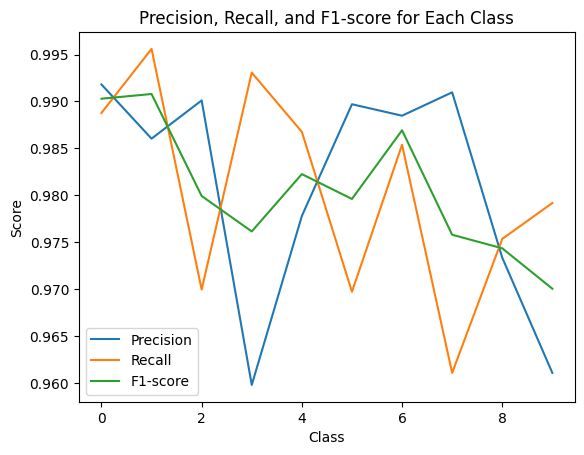

In [25]:
plt.plot(precision, label='Precision')
plt.plot(recall, label='Recall')
plt.plot(f1_score, label='F1-score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.show()